<a href="https://colab.research.google.com/github/Prakhar-998/Customer_Churn_Prediction/blob/main/Customer_Churn_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd

In [47]:
dataset = pd.read_csv("/content/drive/MyDrive/Customer_churn_dataset/customer_churn_dataset-training-master.csv")
dataset.sample(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
422933,430048.0,38.0,Male,53.0,13.0,0.0,20.0,Basic,Annual,889.68,20.0,0.0
214996,220463.0,55.0,Male,30.0,2.0,3.0,25.0,Premium,Annual,779.17,1.0,1.0
87030,89423.0,21.0,Male,60.0,12.0,3.0,21.0,Premium,Annual,749.00,1.0,1.0
423677,430792.0,29.0,Male,6.0,2.0,1.0,20.0,Basic,Quarterly,824.41,28.0,0.0
222688,228491.0,52.0,Male,5.0,21.0,9.0,4.0,Basic,Annual,458.76,8.0,1.0
151974,156785.0,45.0,Female,12.0,10.0,4.0,17.0,Basic,Annual,135.00,6.0,1.0
318079,325194.0,22.0,Female,41.0,9.0,0.0,7.0,Basic,Annual,905.43,14.0,0.0
281035,288149.0,41.0,Male,28.0,27.0,0.0,4.0,Basic,Annual,909.66,30.0,0.0
256383,263497.0,42.0,Male,40.0,9.0,0.0,8.0,Basic,Annual,653.37,1.0,0.0
280139,287253.0,34.0,Male,33.0,8.0,0.0,1.0,Standard,Annual,989.09,9.0,0.0


In [48]:
dataset.shape

(440833, 12)

In [49]:
dataset.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [50]:
dataset.drop('CustomerID', axis="columns", inplace=True)
dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [51]:
dataset.Age.values

array([30., 65., 55., ..., 26., 28., 31.])

In [52]:
pd.to_numeric(dataset.Age) #if there was an empty row it would give error, to fix that use(dataset.Age,error="coerce") #doesnt seem to work, huh??  because pdtonumeric converts to both float and int

,Age
0,30.0
1,65.0
2,55.0
3,58.0
4,23.0
...,...
440828,42.0
440829,25.0
440830,26.0
440831,28.0


In [53]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce',downcast="integer") #usually this downcast should work, but it is not working here. so use .astype in next cell

# If it is needed to refill the cols instead in future, fill NaN values with 0 and convert to integers, although i will just be dropping the incomplete rows altogether
#dataset['Age'] = dataset['Age'].fillna(0).astype(int)

In [54]:
# Convert 'Age' to numeric and replace NaNs with a temporary value
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce').fillna(-1)

# Convert to integers
dataset['Age'] = dataset['Age'].astype(int)

# Replace the temporary value with NaNs
dataset['Age'] = dataset['Age'].replace(-1, pd.NA)
dataset.dropna(subset=['Age'], inplace=True)

In [55]:
dataset.dtypes

,0
Age,object
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64
Last Interaction,float64


In [56]:
dataset[dataset.Tenure.isnull()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [57]:
dataset.drop(dataset[dataset.Tenure.isnull()].index,inplace =True)

In [58]:
#drop for entire dataset
dataset.dropna(inplace=True)

In [59]:
dataset.iloc[199295] # INDEXING ,showing the next row, as we dropped that row(was nan)

,199296
Age,36
Gender,Female
Tenure,46.0
Usage Frequency,24.0
Support Calls,7.0
Payment Delay,1.0
Subscription Type,Basic
Contract Length,Monthly
Total Spend,118.9
Last Interaction,27.0


In [60]:
dataset.iloc[1]["Age"]

65

In [61]:
data_no_spend = dataset[dataset['Total Spend']==0]
data_no_spend.shape

(0, 11)

In [62]:
df1=dataset[dataset.Age!=" "]  #Note : Dot notation wont work under certain restrictions like there being a space in class name(as in Total Spend)
df1.shape

(440832, 11)

In [63]:
tenure_churn_no=dataset[dataset.Churn==0]['Tenure']
tenure_churn_yes=dataset[dataset.Churn==1]['Tenure']


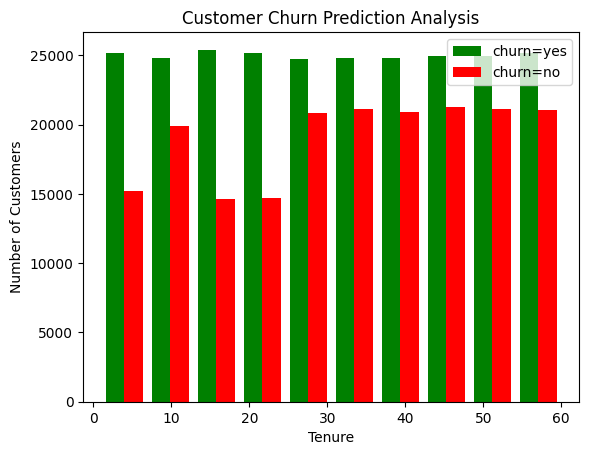

In [64]:
import matplotlib.pyplot as plt
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Analysis")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

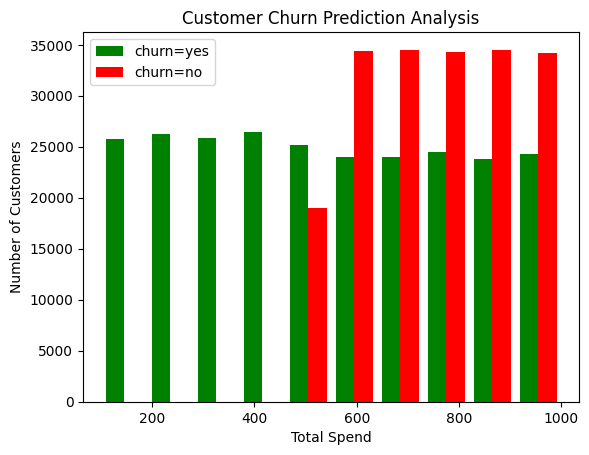

In [65]:
tenure_churn_no=dataset[dataset.Churn==0]['Total Spend']
tenure_churn_yes=dataset[dataset.Churn==1]['Total Spend']
import matplotlib.pyplot as plt
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Analysis")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()

In [66]:
def print_cols_with_UniqueVals(dataset):
  for column in dataset:
    if dataset[column].dtype == 'object':
      print(f'{column} : {dataset[column].unique()}')

In [67]:
print_cols_with_UniqueVals(dataset)

Age : [30 65 55 58 23 51 39 64 29 52 22 48 24 49 19 47 42 57 27 59 21 60 35 18
 56 20 63 25 28 32 38 37 31 53 41 33 26 36 44 34 61 40 45 46 54 43 50 62]
Gender : ['Female' 'Male']
Subscription Type : ['Standard' 'Basic' 'Premium']
Contract Length : ['Annual' 'Monthly' 'Quarterly']


In [68]:
dataset.replace('Male',"M",inplace=True)
dataset.replace('Female',"F",inplace=True)

<ipython-input-68-f9c4b0b355ef>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace('Male',"M",inplace=True)


In [69]:
dataset['Gender'].replace({"F":1,"M":0},inplace=True)

<ipython-input-69-641d4722b7a4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace({"F":1,"M":0},inplace=True)
<ipython-input-69-641d4722b7a4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'].replace({"F":1,"M":0},inplace=True)


In [70]:
print(dataset.Gender)

0         1
1         1
2         1
3         0
4         0
         ..
440828    0
440829    1
440830    0
440831    0
440832    0
Name: Gender, Length: 440832, dtype: int64


In [71]:
checkpoint = dataset.copy()

In [72]:
df=pd.get_dummies(data=dataset,columns=["Subscription Type","Contract Length"],dtype=int)

In [73]:
df.replace("False",0,inplace = True)

In [74]:
df.dtypes


,0
Age,int64
Gender,int64
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Total Spend,float64
Last Interaction,float64
Churn,float64
Subscription Type_Basic,int64


In [75]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30,1,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0,0,1,1,0,0
1,65,1,49.0,1.0,10.0,8.0,557.00,6.0,1.0,1,0,0,0,1,0
2,55,1,14.0,4.0,6.0,18.0,185.00,3.0,1.0,1,0,0,0,0,1
3,58,0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0,0,1,0,1,0
4,23,0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42,0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,0,1,0,0
440829,25,1,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0,1,0,1,0,0
440830,26,0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0,0,1,0,0,1
440831,28,0,55.0,14.0,2.0,0.0,602.55,2.0,0.0,0,0,1,0,0,1


In [76]:
scaled_features = df.copy()

In [77]:
colsToScale = ['Age','Tenure','Usage Frequency','Total Spend',"Support Calls","Payment Delay","Last Interaction"]

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaled_features[colsToScale] = MinMaxScaler().fit_transform(df[colsToScale])

In [79]:
scaled_features.sample(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
188492,0.595745,1,0.457627,0.206897,0.2,0.900000,0.488889,0.448276,1.0,1,0,0,0,1,0
9058,0.595745,0,0.203390,0.413793,0.7,0.000000,0.455556,0.793103,1.0,0,0,1,0,0,1
55490,0.936170,1,0.932203,0.931034,0.4,0.666667,0.635556,0.586207,1.0,0,1,0,0,1,0
113158,0.212766,0,0.016949,0.655172,0.4,0.366667,0.525556,0.172414,1.0,0,0,1,1,0,0
420706,0.255319,0,0.711864,0.517241,0.3,0.466667,0.788011,0.827586,0.0,0,0,1,1,0,0


In [80]:
X = scaled_features.drop('Churn',axis = 'columns')
Y = scaled_features["Churn"]

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

In [82]:
X_train.shape,X_test.shape

((308582, 14), (132250, 14))

In [83]:
X_train[:8]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
376471,0.553191,0,0.983051,0.068966,0.3,0.433333,0.558733,0.000000,0,0,1,1,0,0
94330,0.787234,1,0.169492,0.241379,0.9,0.733333,0.345556,0.758621,0,1,0,0,1,0
247114,0.340426,0,0.203390,0.482759,0.2,0.933333,0.194489,0.448276,1,0,0,1,0,0
228360,0.702128,0,1.000000,0.655172,0.4,0.966667,0.066633,0.413793,0,1,0,1,0,0
100546,0.234043,0,0.610169,0.241379,0.5,1.000000,0.395556,0.551724,0,1,0,0,0,1
187121,0.319149,0,0.389831,0.379310,0.1,0.800000,0.423333,0.827586,1,0,0,0,1,0
36378,0.872340,0,0.440678,0.758621,0.9,0.566667,0.781111,0.724138,1,0,0,0,1,0
164643,0.042553,0,0.016949,0.068966,0.4,0.633333,0.838889,0.793103,1,0,0,1,0,0


In [84]:
import tensorflow as tf
from tensorflow import keras

In [85]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(14,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
model.fit(X_train,Y_train,epochs=25)

Epoch 1/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8624 - loss: 0.3092
Epoch 2/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9007 - loss: 0.2321
Epoch 3/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9066 - loss: 0.2216
Epoch 4/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9180 - loss: 0.2013
Epoch 5/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9261 - loss: 0.1863
Epoch 6/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9270 - loss: 0.1843
Epoch 7/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9282 - loss: 0.1819
Epoch 8/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9286 - loss: 0.1804
Epoch 9/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9300 - loss: 0.1776
Epoch 10/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9389 - loss: 0.1624
Epoch 11/25
9644/9644 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9420 - loss: 0.1565
Epoch 12/25
9644/96

In [88]:
model.evaluate(X_test,Y_test)

4133/4133 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9600 - loss: 0.1127


[0.11329235136508942, 0.9595463275909424]

In [91]:
yPredict=model.predict(X_test)
yPredict[:5]

4133/4133 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[0.9999907 ],
       [0.16337915],
       [1.        ],
       [1.        ],
       [0.9039731 ]], dtype=float32)

In [92]:
y_pred=[]
for element in yPredict:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [94]:
Y_test[:10]

,Churn
212631,1.0
257267,0.0
157197,1.0
145080,1.0
252429,1.0
62521,1.0
157831,1.0
13796,1.0
59153,1.0
376212,0.0


In [93]:
y_pred[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 0]